<a href="https://colab.research.google.com/github/vahadruya/Capstone_Regression_NYC_Taxi_Trip_Duration_Prediction/blob/main/Iterations_Notebooks_and_Results/PWHS_0100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Day 2 - In this notebook, the **passenger_count**, **holiday** and **store_and_fwd_flag** features have been dropped and **extreme_weather** has been included.

## Initial

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/ALMA BETTER/Module 4/#CAPSTONE 1 - REGRESSION/Input data/'
df = pd.read_csv('NYC Taxi Data.csv', parse_dates = ['pickup_datetime', 'dropoff_datetime'])

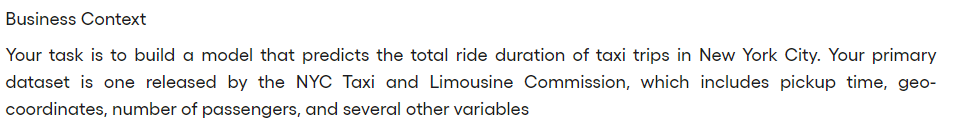

![image](https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/Regression_NYC_Taxi_Trip_Time_Prediction_91a23744ad.png)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
data = df.copy()

## Columns

### Dropoff datetime, ID

In [ ]:
((data['dropoff_datetime'] - data['pickup_datetime']).dt.total_seconds() - data['trip_duration']).value_counts()

0.000000e+00    1220647
1.136868e-13      82271
5.684342e-14      79253
2.842171e-14      33925
2.273737e-13      29992
1.421085e-14       6808
4.547474e-13       4090
7.105427e-15       1021
3.552714e-15        383
1.776357e-15        148
9.094947e-13         65
7.275958e-12         20
3.637979e-12         15
1.818989e-12          4
2.328306e-10          2
dtype: int64

In [ ]:
data['id'].nunique()

1458644

In [ ]:
data = data.drop(['id', 'dropoff_datetime'], axis = 1)

### Pickup, Dropoff coordinates

In [ ]:
# Containing within the box of nYC

data = data[
    data['pickup_latitude'].between(40.46, 40.93) &
    data['dropoff_latitude'].between(40.46, 40.93) &
    data['pickup_longitude'].between(-74.3, -73.65) &
    data['dropoff_longitude'].between(-74.3, -73.65)
]

### Weather

https://www.weather.gov/okx/stormevents

In [ ]:
dates = ['0110', '0113', '0117', '0123',
        '0205', '0208', '0215', '0216',
        '0224', '0225', '0314', '0315',
        '0328', '0329', '0403', '0404',
        '0530', '0628']

weather_event = ['2016' + x for x in dates]

In [ ]:
data.sort_values('pickup_datetime')

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
96469,2,2016-01-01 00:00:17,5,-73.981743,40.719158,-73.938828,40.829182,N,849
223872,1,2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,N,1294
713067,2,2016-01-01 00:01:01,5,-73.965279,40.801041,-73.947479,40.815170,N,408
652463,1,2016-01-01 00:01:14,1,-73.982292,40.751331,-73.991341,40.750340,N,280
722901,1,2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,N,736
...,...,...,...,...,...,...,...,...,...
853710,2,2016-06-30 23:58:52,1,-73.982750,40.745289,-73.969002,40.757950,N,472
419031,1,2016-06-30 23:59:09,2,-73.955109,40.689564,-73.978203,40.685802,N,754
1008720,1,2016-06-30 23:59:10,2,-73.873093,40.774097,-73.926704,40.856739,N,2546
405743,2,2016-06-30 23:59:37,5,-73.998291,40.722618,-73.971779,40.762470,N,1442


In [ ]:
weather_event = pd.Series(pd.to_datetime(weather_event, format = '%Y%m%d')).dt.date

data['extreme_weather'] = data['pickup_datetime'].dt.date.isin(weather_event).map({True : 1, False : 0})

In [ ]:
data['extreme_weather'].value_counts().values[1]/(data['extreme_weather'].value_counts().values[1]+data['extreme_weather'].value_counts().values[0])

0.09128959206172688

(892.7535245137824, 621.0, 965.097606107299, 666.0, 958.4933444105466, 662.0)

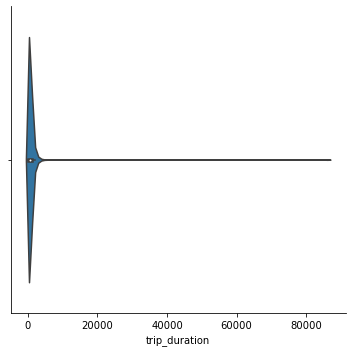

In [ ]:
sns.catplot(data = data[data['extreme_weather'] == 1], x = 'trip_duration', kind = 'violin')

data[data['extreme_weather'] == 1]['trip_duration'].mean(), data[data['extreme_weather'] == 1]['trip_duration'].median(), data[data['extreme_weather'] == 0]['trip_duration'].mean(), data[data['extreme_weather'] == 0]['trip_duration'].median(), data['trip_duration'].mean(), data['trip_duration'].median()

### Pickup datetime -> other variables

In [ ]:
data['day_of_week'] = data['pickup_datetime'].dt.weekday

In [ ]:
data['day_of_month'] = data['pickup_datetime'].dt.day

In [ ]:
data['month'] = data['pickup_datetime'].dt.month

In [ ]:
data['hour_of_day'] = data['pickup_datetime'].dt.hour

In [ ]:
data = data.drop(['pickup_datetime'], axis = 1)

### passenger count

In [ ]:
data['passenger_count'].value_counts()

1    1032787
2     210176
5      78058
3      59862
6      48322
4      28378
0         60
7          2
9          1
8          1
Name: passenger_count, dtype: int64

In [ ]:
# data = data[~data['passenger_count'].isin([0, 7, 8, 9])]
data = data.drop('passenger_count', axis = 1)

### Store_and_fwd_flag

In [ ]:
data['store_and_fwd_flag'].value_counts()

N    1449623
Y       8024
Name: store_and_fwd_flag, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

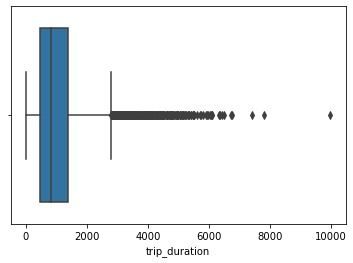

In [ ]:
sns.boxplot(data[data['store_and_fwd_flag'] == 'Y']['trip_duration'].reset_index(drop = True))

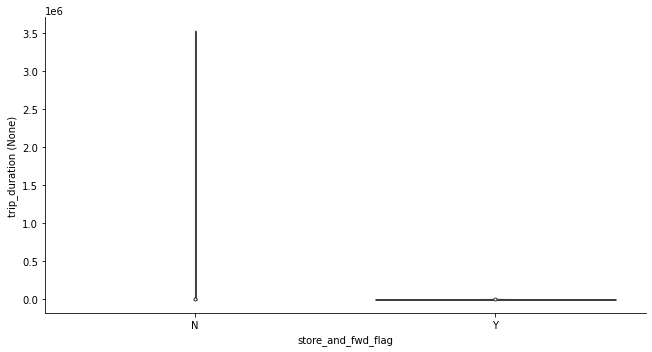

In [ ]:
def catplot_with_median(dataset, variable, legend, median = False, unit = None, kind_ = 'violin'):
  ''' Returns a categorical plot with median. Inputs: Dataframe dataset, continuous variable to plot,
  the discrete variable to legend on, median (True/False), unit and type of plot'''

  sns.catplot(data = dataset, x = legend, y = variable, height = 5, aspect = 11/6, kind = kind_)
  plt.ylabel(variable + f' ({unit})')
  if median == True:
    colour = ['green', 'red', 'yellow', 'pink']
    i = 0
    for value in dataset.dropna()[legend].unique():
      plt.axhline(dataset[dataset[legend] == value][variable].median(), color = colour[i], linestyle = '--', label = f"Median ({legend} = {value}) = {dataset[dataset[legend] == value][variable].median():.2f} {unit}")
      i+=1
    plt.legend(bbox_to_anchor=(1, 0.54))
  plt.show()

catplot_with_median(dataset = data, variable = 'trip_duration', legend = 'store_and_fwd_flag')

In [ ]:
# data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'N':0, 'Y':1})
data = data.drop('store_and_fwd_flag', axis = 1)

### distance and trip_duration

In [ ]:
!pip install haversine

In [ ]:
from haversine import haversine
data

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,extreme_weather,day_of_week,day_of_month,month,hour_of_day
0,2,-73.982155,40.767937,-73.964630,40.765602,455,1,0,14,3,17
1,1,-73.980415,40.738564,-73.999481,40.731152,663,0,6,12,6,0
2,2,-73.979027,40.763939,-74.005333,40.710087,2124,0,1,19,1,11
3,2,-74.010040,40.719971,-74.012268,40.706718,429,0,2,6,4,19
4,2,-73.973053,40.793209,-73.972923,40.782520,435,0,5,26,3,13
...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,-73.982201,40.745522,-73.994911,40.740170,778,0,4,8,4,13
1458640,1,-74.000946,40.747379,-73.970184,40.796547,655,1,6,10,1,7
1458641,2,-73.959129,40.768799,-74.004433,40.707371,764,0,4,22,4,6
1458642,1,-73.982079,40.749062,-73.974632,40.757107,373,0,1,5,1,15


In [ ]:
def calculate_distance(row):
    coords1 = (row['pickup_latitude'], row['pickup_longitude'])
    coords2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    return haversine(coords1, coords2)

In [ ]:
data['distance'] =  data.apply(lambda x: calculate_distance(x), axis=1)

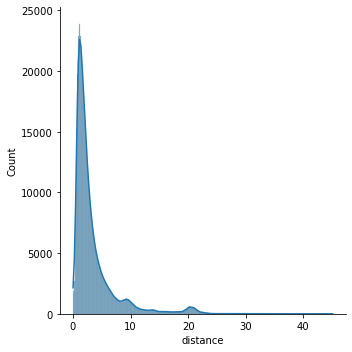

In [ ]:
sns.displot(data['distance'], kde = True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

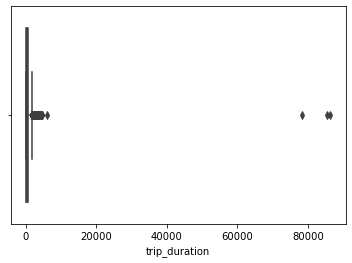

In [ ]:
sns.boxplot(data[data['distance'] == 0]['trip_duration'].reset_index(drop = True))

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance'>

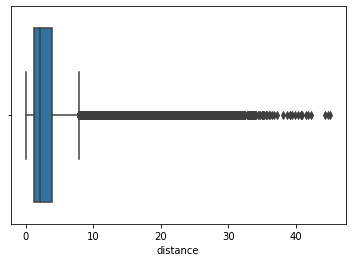

In [ ]:
sns.boxplot(data['distance'])

In [ ]:
td_iqr = data['trip_duration'].quantile(0.75) - data['trip_duration'].quantile(0.25)
max_q3 = data['trip_duration'].quantile(0.75) + 1.5*td_iqr
max_q3

2089.5

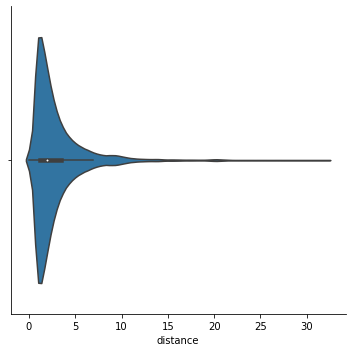

In [ ]:
sns.catplot(data = data[data['trip_duration'] <= max_q3], x = 'distance', kind = 'violin')

<AxesSubplot:xlabel='distance', ylabel='trip_duration'>

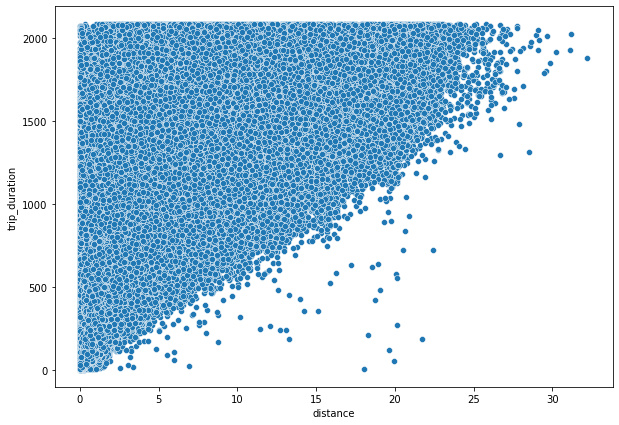

In [ ]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'distance', y = 'trip_duration', data = data[(data['trip_duration'] <= max_q3) & (data['distance'] != 0)])

In [ ]:
dat1 = data[(data['trip_duration'] <= max_q3) & (data['distance'] != 0)]
dat2 = data[data['trip_duration'] <= max_q3]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance'>

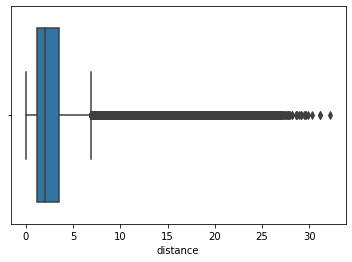

In [ ]:
sns.boxplot(dat2['distance'])

## Variable transformation and scaling

### transform

In [ ]:
dat1t = dat1.copy()
dat2t = dat2.copy()

In [ ]:
dat1t['trip_duration'] = np.sqrt(dat1t['trip_duration'])
dat2t['trip_duration'] = np.sqrt(dat2t['trip_duration'])

In [ ]:
dat1t['distance'] = np.sqrt(dat1t['distance'])
dat2t['distance'] = np.sqrt(dat2t['distance'])

In [ ]:
dat1t

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,extreme_weather,day_of_week,day_of_month,month,hour_of_day,distance
0,2,-73.982155,40.767937,-73.964630,40.765602,21.330729,1,0,14,3,17,1.224142
1,1,-73.980415,40.738564,-73.999481,40.731152,25.748786,0,6,12,6,0,1.343693
3,2,-74.010040,40.719971,-74.012268,40.706718,20.712315,0,2,6,4,19,1.218811
4,2,-73.973053,40.793209,-73.972923,40.782520,20.856654,0,5,26,3,13,1.090225
5,2,-73.982857,40.742195,-73.992081,40.749184,21.047565,0,5,30,1,22,1.048305
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,-73.982201,40.745522,-73.994911,40.740170,27.892651,0,4,8,4,13,1.106834
1458640,1,-74.000946,40.747379,-73.970184,40.796547,25.592968,1,6,10,1,7,2.459643
1458641,2,-73.959129,40.768799,-74.004433,40.707371,27.640550,0,4,22,4,6,2.797252
1458642,1,-73.982079,40.749062,-73.974632,40.757107,19.313208,0,1,5,1,15,1.045259


### split

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
X1 = dat1.drop('trip_duration', axis = 1)
Y1 = dat1['trip_duration']

X2 = dat2.drop('trip_duration', axis = 1)
Y2 = dat2['trip_duration']

X1t = dat1t.drop('trip_duration', axis = 1)
Y1t = dat1t['trip_duration']

X2t = dat2t.drop('trip_duration', axis = 1)
Y2t = dat2t['trip_duration']

In [ ]:
rs = 8

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = rs)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = rs)

X1t_train, X1t_test, Y1t_train, Y1t_test = train_test_split(X1t, Y1t, test_size = 0.2, random_state = rs)

X2t_train, X2t_test, Y2t_train, Y2t_test = train_test_split(X2t, Y2t, test_size = 0.2, random_state = rs)

### scaling

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler1 = StandardScaler()
X1s_train = scaler1.fit_transform(X1_train)
X1s_test = scaler1.transform(X1_test)

scaler2 = StandardScaler()
X2s_train = scaler2.fit_transform(X2_train)
X2s_test = scaler2.transform(X2_test)

scaler1t = StandardScaler()
X1ts_train = scaler1t.fit_transform(X1t_train)
X1ts_test = scaler1t.transform(X1t_test)

scaler2t = StandardScaler()
X2ts_train = scaler2t.fit_transform(X2t_train)
X2ts_test = scaler2t.transform(X2t_test)

## reference - datacouples

In [ ]:
# # Couples:

# (X1_train, Y1_train)
# (X2_train, Y2_train)
# (X1t_train, Y1t_train)
# (X2t_train, Y2t_train)

# (X1s_train, Y1_train)
# (X2s_train, Y2_train)
# (X1ts_train, Y1t_train)
# (X2ts_train, Y2t_train)

In [ ]:
input_names = {'s1': [X1_train, X1_test, Y1_train, Y1_test],
               's2': [X2_train, X2_test, Y2_train, Y2_test],
               's1t': [X1t_train, X1t_test, Y1t_train, Y1t_test],
               's2t': [X2t_train, X2t_test, Y2t_train, Y2t_test],
               }

## Model implementation

### initial

In [ ]:
sns.set()

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def evaluate_model(y_true, y_pred, X_true):
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r2 = r2_score(y_true, y_pred)
  adj_r2 = 1 - (1 - r2) * ((X_true.shape[0] - 1) / (X_true.shape[0] - X_true.shape[1] - 1))
  return mse, rmse, r2, adj_r2

In [ ]:
score_names = ['mse_train', 'rmse_train', 'r2_train', 'adj_r2_train', 'mse_test', 'rmse_test', 'r2_test', 'adj_r2_test']
scores = dict()
for x in input_names:
  scores[x] = {'mse_train':[], 'rmse_train':[], 'r2_train':[], 'adj_r2_train':[], 'mse_test':[], 'rmse_test':[], 'r2_test':[], 'adj_r2_test':[]}

In [ ]:
model_names = ['Linear Regression', 'Decision Tree', 'Polynomial Regression', 'Lasso', 'Ridge', 'Elastic Net', 'XGBoost']

### 1. linear regression

In [ ]:
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  reg = LinearRegression()
  reg.fit(X_train, Y_train)
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1:
Train scores = (99638.37862502145, 315.6554745684311, 0.5010858600444801, 0.5010808816699468)
Test scores = (100120.10153541931, 316.4176062348922, 0.5015559195857967, 0.5015360242178006)

Iteration s2:
Train scores = (100459.73290802143, 316.9538340326891, 0.4983562150094132, 0.49835122989620195)
Test scores = (99681.28831126154, 315.72343643014773, 0.502445728394409, 0.5024259499288566)

Iteration s1t:
Train scores = (28.349771466849752, 5.324450344105929, 0.5810356906931704, 0.5810315100915784)
Test scores = (28.33289833507174, 5.322865613095238, 0.5830065351488841, 0.5829898908777188)

Iteration s2t:
Train scores = (29.068090836731432, 5.39148317596665, 0.5738238424809186, 0.5738196073314824)
Test scores = (28.937743726782028, 5.379381351678093, 0.5763043841188162, 0.5762875416362537)



In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 0
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

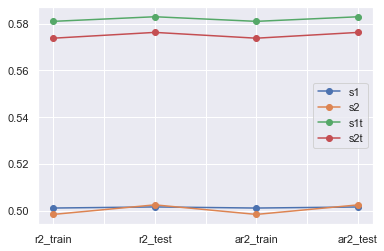

In [ ]:
r2s_df.T.iloc[:,:4].plot(marker = 'o')

In [ ]:
r2s_df.T

,s1,s2,s1t,s2t
r2_train,0.501086,0.498356,0.581036,0.573824
r2_test,0.501556,0.502446,0.583007,0.576304
ar2_train,0.501081,0.498351,0.581032,0.573820
ar2_test,0.501536,0.502426,0.582990,0.576288


### 2. Decision tree

In [ ]:
param_dt = {'max_depth' : [20, 25], 'min_samples_split' : [40, 60, 80]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]
  dt = DecisionTreeRegressor()
  dt_grid = GridSearchCV(estimator = dt, param_grid = param_dt, cv = 5, scoring = 'r2', n_jobs = 3)
  dt_grid.fit(X_train, Y_train)

  reg = dt_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {dt_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1:
Best params = {'max_depth': 20, 'min_samples_split': 80}
Train scores = (42769.48343137716, 206.80784180339285, 0.7858425604975785, 0.7858404235448294)
Test scores = (56164.61604937359, 236.9907509785426, 0.7203866159819754, 0.7203754552291644)

Iteration s2:
Best params = {'max_depth': 20, 'min_samples_split': 80}
Train scores = (43243.55587495112, 207.9508496615273, 0.7840641178548237, 0.7840619719798999)
Test scores = (56519.26471690607, 237.73780666294132, 0.717886856557343, 0.717875642172485)

Iteration s1t:
Best params = {'max_depth': 20, 'min_samples_split': 80}
Train scores = (13.955148877927988, 3.7356590955182174, 0.7937652048535273, 0.7937631469562464)
Test scores = (18.116533007221644, 4.256352077451024, 0.7333673463113484, 0.7333567036836729)

Iteration s2t:
Best params = {'max_depth': 20, 'min_samples_split': 80}
Train scores = (14.27340661146986, 3.778016226999278, 0.7907332263907401, 0.790731146790456)
Test scores = (18.406102048882786, 4.2902333326851565,

In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 1
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

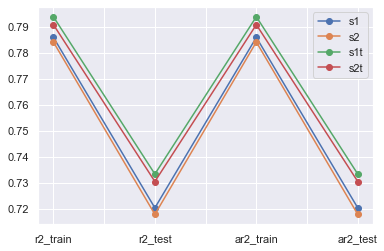

In [ ]:
r2s_df.T.iloc[:,:4].plot(marker = 'o')

In [ ]:
r2s_df.T

,s1,s2,s1t,s2t
r2_train,0.785843,0.784064,0.793765,0.790733
r2_test,0.720387,0.717887,0.733367,0.730505
ar2_train,0.785840,0.784062,0.793763,0.790731
ar2_test,0.720375,0.717876,0.733357,0.730494


### 3. Polynomial regression

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
    X_train, X_test, Y_train, Y_test = input_names[input]

    poly_reg = PolynomialFeatures(degree = 2)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.transform(X_test)

    reg = LinearRegression()
    reg.fit(X_train_poly, Y_train)

    Y_train_pred = reg.predict(X_train_poly)
    Y_test_pred = reg.predict(X_test_poly)

    train_scores = evaluate_model(Y_train, Y_train_pred, X_train_poly)
    test_scores = evaluate_model(Y_test, Y_test_pred, X_test_poly)
    print(f'Iteration {input}:')
    print(f'Train scores = {train_scores}')
    print(f'Test scores = {test_scores}\n')

    for i, score in enumerate(score_names):
        if 'train' in score:
            scores[input][score].append(train_scores[i])
        elif 'test' in score:
            scores[input][score].append(test_scores[i-4])

Iteration s1:
Train scores = (73936.58441042127, 271.9128250201179, 0.6297811352270377, 0.6297549384048564)
Test scores = (74122.14806011973, 272.25383020284534, 0.6309857325196422, 0.63088126381562)

Iteration s2:
Train scores = (75036.58835387355, 273.9280714966496, 0.6253062087166654, 0.6252798038309586)
Test scores = (74669.62813306079, 273.25743930048964, 0.6272902059532459, 0.6271851235433836)

Iteration s1t:
Train scores = (23.436901150405532, 4.841167333444025, 0.653640061463846, 0.6536155529080054)
Test scores = (23.422128185453, 4.839641328182596, 0.6552814939462388, 0.6551839034226372)

Iteration s2t:
Train scores = (24.497407448289454, 4.949485574106611, 0.6408360275832523, 0.6408107170927604)
Test scores = (24.48755074421587, 4.948489743771919, 0.6414624446207284, 0.6413613579550513)

CPU times: total: 26.7 s
Wall time: 24.8 s


In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 2
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

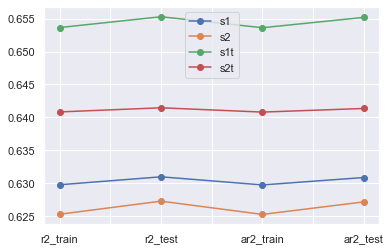

In [ ]:
r2s_df.T.iloc[:,:4].plot(marker = 'o')

In [ ]:
r2s_df.T

,s1,s2,s1t,s2t
r2_train,0.629781,0.625306,0.653640,0.640836
r2_test,0.630986,0.627290,0.655281,0.641462
ar2_train,0.629755,0.625280,0.653616,0.640811
ar2_test,0.630881,0.627185,0.655184,0.641361


### 4. Lasso

In [ ]:
param_lasso = {'alpha' : [0.00001, 0.001, 0.1, 1]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  lasso = Lasso()
  lasso_grid = GridSearchCV(estimator = lasso, param_grid = param_lasso, cv = 5, scoring = 'r2')
  lasso_grid.fit(X_train, Y_train)

  reg = lasso_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {lasso_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1:
Best params = {'alpha': 1e-05}
Train scores = (99638.3786257948, 315.65547456965606, 0.5010858600406077, 0.5010808816660745)
Test scores = (100120.10420283308, 316.4176104499133, 0.5015559063061796, 0.5015360109376535)

Iteration s2:
Best params = {'alpha': 1e-05}
Train scores = (100459.73290878521, 316.953834033894, 0.49835621500559923, 0.498351229892388)
Test scores = (99681.2886047559, 315.7234368949443, 0.5024457269294462, 0.5024259484638356)

Iteration s1t:
Best params = {'alpha': 1e-05}
Train scores = (28.349772209703065, 5.324450413864614, 0.5810356797149858, 0.5810314991132842)
Test scores = (28.332937938927206, 5.322869333256942, 0.583005952273503, 0.5829893079790722)

Iteration s2t:
Best params = {'alpha': 1e-05}
Train scores = (29.068091574205763, 5.391483244359177, 0.5738238316685822, 0.5738195965190386)
Test scores = (28.93773759698387, 5.379380781928703, 0.5763044738690273, 0.5762876313900325)

CPU times: total: 1min 2s
Wall time: 33.8 s


In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 3
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

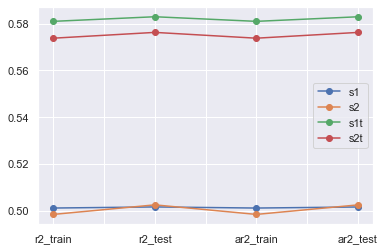

In [ ]:
r2s_df.T.iloc[:,:4].plot(marker = 'o')

In [ ]:
r2s_df.T

,s1,s2,s1t,s2t
r2_train,0.501086,0.498356,0.581036,0.573824
r2_test,0.501556,0.502446,0.583006,0.576304
ar2_train,0.501081,0.498351,0.581031,0.573820
ar2_test,0.501536,0.502426,0.582989,0.576288


### 5. Ridge

In [ ]:
param_ridge = {'alpha' : [0.000001, 0.00001, 0.001, 0.1, 1, 10]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  ridge = Ridge()
  ridge_grid = GridSearchCV(estimator = ridge, param_grid = param_ridge, cv = 5, scoring = 'r2')
  ridge_grid.fit(X_train, Y_train)

  reg = ridge_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {lasso_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1:
Best params = {'alpha': 1e-05}
Train scores = (99638.37872094933, 315.6554747203814, 0.5010858595641453, 0.5010808811896073)
Test scores = (100120.1267751283, 316.41764611843047, 0.5015557939308748, 0.5015358985578633)

Iteration s2:
Best params = {'alpha': 1e-05}
Train scores = (100459.7330004795, 316.9538341785433, 0.4983562145477255, 0.4983512294345097)
Test scores = (99681.29060542608, 315.7234400633347, 0.5024457169431991, 0.5024259384771914)

Iteration s1t:
Best params = {'alpha': 1e-05}
Train scores = (28.349771485277163, 5.324450345836381, 0.5810356904208428, 0.581031509819248)
Test scores = (28.33290463878628, 5.322866205230626, 0.5830064423730679, 0.5829897980981994)

Iteration s2t:
Best params = {'alpha': 1e-05}
Train scores = (29.06809085347736, 5.391483177519648, 0.5738238422354013, 0.5738196070859627)
Test scores = (28.937742391029925, 5.379381227523285, 0.5763044036763987, 0.5762875611946137)

CPU times: total: 41.3 s
Wall time: 22.3 s


In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 4
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

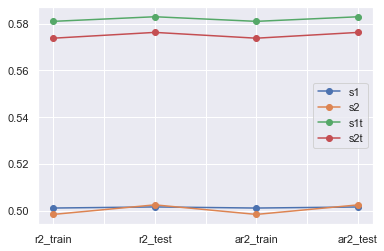

In [ ]:
r2s_df.T.iloc[:,:4].plot(marker = 'o')

In [ ]:
r2s_df.T

,s1,s2,s1t,s2t
r2_train,0.501086,0.498356,0.581036,0.573824
r2_test,0.501556,0.502446,0.583006,0.576304
ar2_train,0.501081,0.498351,0.581032,0.573820
ar2_test,0.501536,0.502426,0.582990,0.576288


### 6. ELastic Net

In [ ]:
param_elastic = {'alpha' : [0.00001, 0.001, 0.1, 10], 'l1_ratio' : [0.1, 0.5, 0.9]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  elastic = ElasticNet()
  elastic_grid = GridSearchCV(estimator = elastic, param_grid = param_elastic, cv = 5, scoring = 'r2')
  elastic_grid.fit(X_train, Y_train)

  reg = elastic_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {elastic_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1:
Best params = {'alpha': 1e-05, 'l1_ratio': 0.9}
Train scores = (99638.39039364418, 315.6554932099934, 0.5010858011160594, 0.5010808227409381)
Test scores = (100120.39235693596, 316.4180657878686, 0.5015544717420449, 0.5015345763162583)

Iteration s2:
Best params = {'alpha': 1e-05, 'l1_ratio': 0.9}
Train scores = (100459.74434439596, 316.9538520737616, 0.4983561579020922, 0.4983511727883134)
Test scores = (99681.32440656093, 315.72349359298704, 0.5024455482264889, 0.5024257697537746)

Iteration s1t:
Best params = {'alpha': 1e-05, 'l1_ratio': 0.9}
Train scores = (28.349776557494934, 5.324450822150106, 0.5810356154615713, 0.5810314348592287)
Test scores = (28.333007503728304, 5.322875867773765, 0.5830049284436394, 0.5829882841083425)

Iteration s2t:
Best params = {'alpha': 1e-05, 'l1_ratio': 0.9}
Train scores = (29.068095639590478, 5.391483621378301, 0.5738237720647352, 0.5738195369145993)
Test scores = (28.937727440891784, 5.379379837945242, 0.5763046225707275, 0.5762877800

In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 5
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

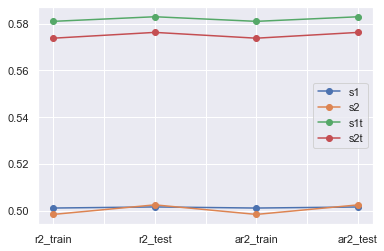

In [ ]:
r2s_df.T.iloc[:,:4].plot(marker = 'o')

In [ ]:
r2s_df.T

,s1,s2,s1t,s2t
r2_train,0.501086,0.498356,0.581036,0.573824
r2_test,0.501554,0.502446,0.583005,0.576305
ar2_train,0.501081,0.498351,0.581031,0.573820
ar2_test,0.501535,0.502426,0.582988,0.576288


### 7. XGBoost

In [ ]:
# param_xg = {'max_depth' : [20, 25], 'learning_rate' : [0.01, 0.1, 0.3], 'n_estimators' : [50, 100, 150]}

param_xg = {'max_depth' : [15], 'learning_rate' : [0.1], 'n_estimators' : [100]}

In [ ]:
%%time
input_names_2 = {'s1': [X1_train, X1_test, Y1_train, Y1_test],
               's2': [X2_train, X2_test, Y2_train, Y2_test],
               's2t': [X2t_train, X2t_test, Y2t_train, Y2t_test],
               }

for input in input_names_2:
  X_train, X_test, Y_train, Y_test = input_names_2[input]
  xg = xgb.XGBRegressor()
  xg_grid = GridSearchCV(estimator = xg, param_grid = param_xg, cv = 5, scoring = 'r2', n_jobs = 3)
  xg_grid.fit(X_train, Y_train)

  reg = xg_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {xg_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1:
Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Train scores = (17996.919358413907, 134.1525972853821, 0.9098849492790009, 0.9098840500732305)
Test scores = (39888.13585555932, 199.72014384022287, 0.8014184475339605, 0.8014105211622394)

Iteration s2:
Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Train scores = (18244.597585114694, 135.07256414651604, 0.908895945437097, 0.9088950400854519)
Test scores = (39989.03746353039, 199.97259178079977, 0.8003966768041088, 0.8003887422979106)

Iteration s2t:
Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Train scores = (6.130004877405366, 2.47588466561053, 0.9101261263115137, 0.9101252331848599)
Test scores = (13.115377005501145, 3.6215158436076385, 0.8079695573253434, 0.8079619238515452)

CPU times: total: 40min 28s
Wall time: 1h 18min 25s


In [ ]:
# Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 80}
# Train scores = (18696.025470614226, 136.733410220817, 0.9065004479694372, 0.9064994301367559)
# Test scores = (40295.50115847913, 200.73739352317776, 0.7983430099943146, 0.7983342287772954)

# CPU times: total: 10min 40s
# Wall time: 22min 14s

In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 6
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

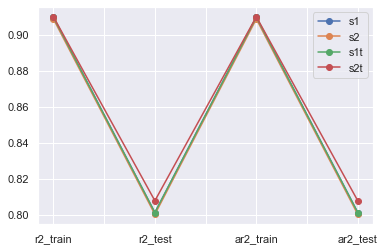

In [ ]:
r2s_df.T.iloc[:,:4].plot(marker = 'o')

In [ ]:
r2s_df.T

,s1,s2,s1t,s2t
r2_train,0.909885,0.908896,0.909885,0.910126
r2_test,0.801418,0.800397,0.801418,0.807970
ar2_train,0.909884,0.908895,0.909884,0.910125
ar2_test,0.801411,0.800389,0.801411,0.807962


## pickle

In [ ]:
import pickle

with open('scores_PWHS0100.pkl', 'wb') as f:
    pickle.dump(scores, f)

# with open('scores_PWHS0100.pkl', 'rb') as f:
#     scores = pickle.load(f)

In [ ]:
scores

In [ ]:
# path2 = '/content/drive/MyDrive/ALMA BETTER/Module 4/#CAPSTONE ROUGHS/#CAPSTONE REGRESSION/PWHS_1001.csv'

In [ ]:
dff = pd.DataFrame(scores['s1']['r2_test'], index = model_names)
dff.rename(columns = {0 : 's1'}, inplace = True)
for input in list(input_names.keys())[1:]:
  dff[input] = scores[input]['r2_test']
dff.to_csv('PWHS_1001.csv')
dff

,s1,s2,s1t,s2t
Linear Regression,0.501556,0.502446,0.583007,0.576304
Decision Tree,0.720387,0.717887,0.733367,0.730505
Polynomial Regression,0.630986,0.627290,0.655281,0.641462
Lasso,0.501556,0.502446,0.583006,0.576304
Ridge,0.501556,0.502446,0.583006,0.576304
Elastic Net,0.501554,0.502446,0.583005,0.576305
XGBoost,0.801418,0.800397,0.801418,0.807970


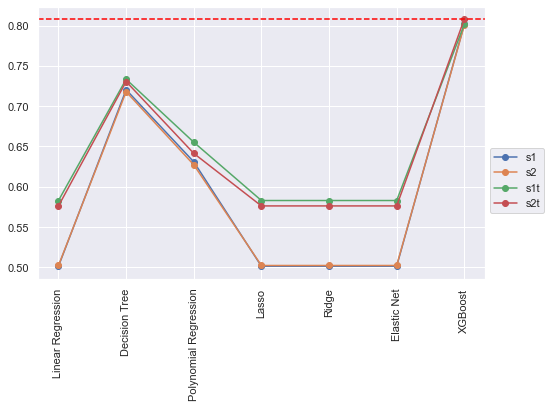

In [ ]:
for itr in dff.columns[:4]:
  ax = dff[itr].plot(figsize = (8, 5), marker = 'o', title = None)
  plt.xticks(rotation = 90)
  plt.legend(bbox_to_anchor = (1, 0.5))
ax.axhline(dff.max().max(), color = 'red', linestyle = '--')